# Experimental phase & result

In [21]:
# import the necessary packages

from torchsummary import summary
import torch.optim as optim
import torch.nn as nn
import torch
import numpy as np
import cv2
import os

In [22]:
data_dir = 'raw/'
real_dir = os.path.join(data_dir, 'ClientRaw')
fake_dir = os.path.join(data_dir, 'ImposterRaw')

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [24]:
def load_images_from_folder(folder):
    sub_dir_folder = os.listdir(folder)
    images = []
    for sub_dir in sub_dir_folder:
        img_dir = os.path.join(folder, sub_dir)
        counter = 0
        for filename in os.listdir(img_dir):
            img = cv2.imread(os.path.join(img_dir, filename))
            if counter == 2:
                break
            if img is not None:
#                 print(os.path.join(img_dir, filename))
                img = mpimg.imread(os.path.join(img_dir, filename))
                images.append(img)
                counter += 1
    return images

In [25]:
reals = load_images_from_folder(real_dir)
fakes = load_images_from_folder(fake_dir)

In [26]:
print(len(reals))
print(len(fakes))

30
30


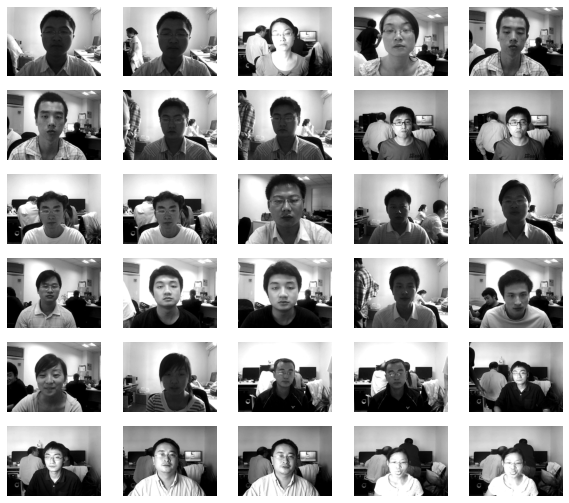

In [27]:
w = 25
h = 25
fig = plt.figure(figsize=(10, 9))
columns = 5
rows = 6
for i in range(1, columns*rows +1):
    img = reals[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[:, :, 1], cmap='gray')
    plt.axis("off")
plt.show()

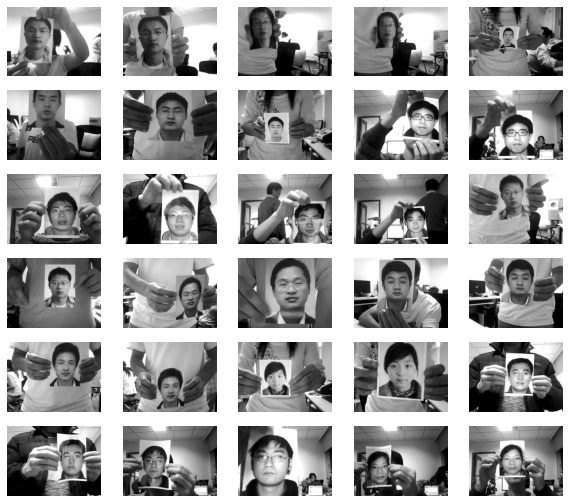

In [28]:
w = 25
h = 25
fig = plt.figure(figsize=(10, 9))
columns = 5
rows = 6
for i in range(1, columns*rows +1):
    img = fakes[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[:, :, 1], cmap='gray')
    plt.axis("off")
plt.show()

In [29]:
from config import opt
from data import myData
from torch.utils.data import DataLoader
from tqdm import tqdm
import models

In [30]:
def test(**kwargs):
    import glob
    pths = glob.glob('checkpoints/%s/*.pth'%(opt.model))
    pths.sort(key=os.path.getmtime, reverse=True)
    print(pths)
    opt.parse(kwargs)
    opt.load_model_path=pths[0]
    model = getattr(models, opt.model)().eval()
    assert os.path.exists(opt.load_model_path)
    if opt.load_model_path:
        model.load(opt.load_model_path)
    if opt.use_gpu: model.cuda()
    model.train(False)
    #result_name = '../../model/se-resnet/test_se_resnet50'
    test_data = myData(
        filelists =opt.test_filelists,
        #transform =data_transforms['val'],
        transform = None, scale = opt.cropscale,
        test = True, data_source = 'none')
    test_loader = DataLoader(dataset = test_data, batch_size = opt.batch_size//2,shuffle = False)
    #test_loader =DataLoader(dataset = test_data,batch_size = opt.batch_size//2,shuffle =True)
    result_list=[]
    
    label_list = []
    
    for step, batch in enumerate(tqdm(test_loader, desc='test %s'%(opt.model), unit='batch')):
        data, label, image_path = batch
        with torch.no_grad():
            if opt.use_gpu:
                data =  data.cuda()
            outputs = model(data)
            outputs = torch.softmax(outputs, dim=-1)
            preds = outputs.to('cpu').numpy()
            for i in range(preds.shape[0]):
                result_list.append(preds[i])
                label_list.append(label[i])
    return result_list, label_list 

In [31]:
result_list, label_list = test() 

['checkpoints/Myxception/4.pth', 'checkpoints/Myxception/3.pth', 'checkpoints/Myxception/2.pth', 'checkpoints/Myxception/1.pth', 'checkpoints/Myxception/0.pth']
user config:
model Myxception
env Myxception
ATTACK 1
GENUINE 0
LABELS ['Genuine', 'Attack']
train_filelists [['/home/maestro/Public/Project/python/face-antispoofing-model/face-antispoof-model/raw/ClientRaw', '/home/maestro/Public/Project/python/face-antispoofing-model/face-antispoof-model/raw/client_train_raw.txt', 0], ['/home/maestro/Public/Project/python/face-antispoofing-model/face-antispoof-model/raw/ImposterRaw', '/home/maestro/Public/Project/python/face-antispoofing-model/face-antispoof-model/raw/imposter_train_raw.txt', 1]]
test_filelists [['/home/maestro/Public/Project/python/face-antispoofing-model/face-antispoof-model/raw/ClientRaw', '/home/maestro/Public/Project/python/face-antispoofing-model/face-antispoof-model/raw/client_test_raw.txt', 0], ['/home/maestro/Public/Project/python/face-antispoofing-model/face-antispo

FileNotFoundError: [Errno 2] No such file or directory: '/home/maestro/Public/Project/python/face-antispoofing-model/face-antispoof-model/raw/client_test_raw.txt'